*Имя: Анастасия*
*Фамилия: Сергеева*
*Электронная почта:sergeevaai036@mgpu.ru*

# Задача 3.1.2. Импорт данных. Предобработка данных

Импорт данных.

In [ ]:
# Импорт необходимых библиотек

import statistics
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
from google.colab import files
uploaded = files.upload()

Saving ad_viz_plotval_data.csv to ad_viz_plotval_data.csv


In [63]:
df = pd.read_csv('ad_viz_plotval_data.csv')
print(df)

            Date Source    Site ID  POC  Daily Mean PM2.5 Concentration  \
0     01/01/2023    AQS  490352005    1                             4.6   
1     01/02/2023    AQS  490352005    1                             4.0   
2     01/03/2023    AQS  490352005    1                            12.5   
3     01/04/2023    AQS  490352005    1                             9.9   
4     01/05/2023    AQS  490352005    1                             2.2   
...          ...    ...        ...  ...                             ...   
6509  12/27/2023    AQS  490450004    3                            15.5   
6510  12/28/2023    AQS  490450004    3                            17.6   
6511  12/29/2023    AQS  490450004    3                            19.3   
6512  12/30/2023    AQS  490450004    3                            26.6   
6513  12/31/2023    AQS  490450004    3                            18.7   

         UNITS  DAILY_AQI_VALUE    Site Name  DAILY_OBS_COUNT  \
0     ug/m3 LC               19  C

In [ ]:
df.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2023,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,01/03/2023,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,01/04/2023,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,01/05/2023,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167


Получение типов данных и пропущенных значений:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            6514 non-null   object 
 1   Source                          6514 non-null   object 
 2   Site ID                         6514 non-null   int64  
 3   POC                             6514 non-null   int64  
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64
 5   UNITS                           6514 non-null   object 
 6   DAILY_AQI_VALUE                 6514 non-null   int64  
 7   Site Name                       6514 non-null   object 
 8   DAILY_OBS_COUNT                 6514 non-null   int64  
 9   PERCENT_COMPLETE                6514 non-null   float64
 10  AQS_PARAMETER_CODE              6514 non-null   int64  
 11  AQS_PARAMETER_DESC              6514 non-null   object 
 12  CBSA_CODE                       65

У Date тип данных object, а должен быть тип даты.

# **Шаг 2. Обработка данных**

In [64]:
# поменять тип данных
df['Date']=df['Date'].astype('datetime64')

Проверить снова типы данных.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            6514 non-null   datetime64[ns]
 1   Source                          6514 non-null   object        
 2   Site ID                         6514 non-null   int64         
 3   POC                             6514 non-null   int64         
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64       
 5   UNITS                           6514 non-null   object        
 6   DAILY_AQI_VALUE                 6514 non-null   int64         
 7   Site Name                       6514 non-null   object        
 8   DAILY_OBS_COUNT                 6514 non-null   int64         
 9   PERCENT_COMPLETE                6514 non-null   float64       
 10  AQS_PARAMETER_CODE              6514 non-null   int64         
 11  AQS_

In [ ]:
df.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,2023-01-01,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,2023-01-02,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,2023-01-03,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,2023-01-04,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,2023-01-05,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167


Теперь даты отображаются верно.

Описательная статистика

In [ ]:
# экспортировать список, содержащий даты
date = df["Date"].tolist()
print(date)

[Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00'), Timestamp('2023-01-06 00:00:00'), Timestamp('2023-01-07 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-09 00:00:00'), Timestamp('2023-01-10 00:00:00'), Timestamp('2023-01-11 00:00:00'), Timestamp('2023-01-12 00:00:00'), Timestamp('2023-01-13 00:00:00'), Timestamp('2023-01-14 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-16 00:00:00'), Timestamp('2023-01-17 00:00:00'), Timestamp('2023-01-18 00:00:00'), Timestamp('2023-01-19 00:00:00'), Timestamp('2023-01-20 00:00:00'), Timestamp('2023-01-21 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-23 00:00:00'), Timestamp('2023-01-24 00:00:00'), Timestamp('2023-01-25 00:00:00'), Timestamp('2023-01-26 00:00:00'), Timestamp('2023-01-27 00:00:00'), Timestamp('2023-01-31 00:00:00'), Timestamp('2023-02-01 00:00:00'), Timestamp('20

Посмотреть с какой даты начинался сбор данных, а какая дата последняя.

In [ ]:
print(np.min(date))
print(np.max(date))

2023-01-01 00:00:00
2023-12-31 00:00:00


Данные собраны с января по декабрь 2023 года.

Среднее значение, медиана, минимальное и максимальное значения концентрации PM2.5

In [ ]:
# экспортировать список, содержащий PM2.5
pm2 = df["Daily Mean PM2.5 Concentration"].tolist()
print(pm2)

[4.6, 4.0, 12.5, 9.9, 2.2, 5.0, 7.8, 2.0, 1.9, 1.0, 3.0, 5.3, 5.5, 2.1, 2.2, 4.0, 6.0, 3.8, 6.6, 5.8, 7.3, 9.2, 7.1, 8.9, 17.1, 15.8, 4.9, 14.4, 27.7, 36.8, 44.2, 48.7, 25.6, 8.0, 11.2, 10.8, 7.1, 13.4, 27.6, 26.6, 26.9, 1.3, 2.8, 6.4, 10.3, 19.4, 9.0, 5.9, 2.7, 2.5, 1.6, 2.3, 6.7, 7.0, 1.0, 1.0, 2.5, 3.1, 4.0, 4.3, 2.5, 1.7, 8.6, 11.6, 3.7, 2.3, 3.4, 9.6, 3.1, 1.5, 1.8, 3.1, 5.8, 5.1, 2.9, 1.3, 3.7, 1.4, 1.1, 1.6, 1.0, 1.4, 1.9, 3.2, 3.4, 1.5, 1.7, 2.8, 1.6, 2.0, 1.9, 2.7, 4.0, 4.6, 4.4, 5.2, 5.8, 6.4, 11.9, 2.5, 3.7, 4.7, 7.0, 6.8, 10.8, 2.4, 2.8, 3.2, 3.2, 4.3, 2.8, 2.8, 3.9, 3.8, 3.8, 5.7, 5.6, 6.8, 6.5, 6.4, 5.8, 2.6, 1.8, 2.8, 4.7, 5.5, 5.8, 6.1, 5.9, 4.3, 2.6, 5.2, 6.1, 7.0, 4.6, 11.4, 21.9, 15.8, 8.5, 7.8, 5.8, 6.3, 4.5, 4.8, 5.4, 6.7, 6.6, 7.2, 4.9, 4.8, 4.1, 4.7, 5.0, 3.6, 4.2, 4.4, 4.6, 3.7, 4.0, 3.7, 3.3, 2.6, 4.3, 4.9, 6.5, 11.6, 3.9, 4.5, 6.0, 8.4, 6.4, 5.8, 4.4, 5.3, 5.4, 5.3, 5.9, 6.3, 7.2, 9.1, 21.4, 13.9, 7.3, 6.6, 8.8, 5.8, 5.3, 5.1, 7.9, 6.3, 5.7, 7.2, 6.7, 10.0, 12

In [ ]:
print(np.min(pm2))
print(np.max(pm2))
print(np.mean(pm2))
print(np.median(pm2))

-0.5
52.6
7.243920785999385
5.7


Минимальная концентрация PM2.5 -0.5. Максимальная 52.6, то есть воздух слегка загрязнен. Средняя 7.24, а медиана 5.7.

Теперь смотрим по среднему значению индекса качества воздуха те же показатели.

In [ ]:
# экспортировать список
aqi = df["DAILY_AQI_VALUE"].tolist()
print(aqi)

[19, 17, 52, 41, 9, 21, 33, 8, 8, 4, 13, 22, 23, 9, 9, 17, 25, 16, 28, 24, 30, 38, 30, 37, 62, 59, 20, 56, 84, 104, 122, 134, 79, 33, 47, 45, 30, 54, 84, 81, 82, 5, 12, 27, 43, 66, 38, 25, 11, 10, 7, 10, 28, 29, 4, 4, 10, 13, 17, 18, 10, 7, 36, 48, 15, 10, 14, 40, 13, 6, 8, 13, 24, 21, 12, 5, 15, 6, 5, 7, 4, 6, 8, 13, 14, 6, 7, 12, 7, 8, 8, 11, 17, 19, 18, 22, 24, 27, 50, 10, 15, 20, 29, 28, 45, 10, 12, 13, 13, 18, 12, 12, 16, 16, 16, 24, 23, 28, 27, 27, 24, 11, 8, 12, 20, 23, 24, 25, 25, 18, 11, 22, 25, 29, 19, 48, 72, 59, 35, 33, 24, 26, 19, 20, 23, 28, 28, 30, 20, 20, 17, 20, 21, 15, 18, 18, 19, 15, 17, 15, 14, 11, 18, 20, 27, 48, 16, 19, 25, 35, 27, 24, 18, 22, 23, 22, 25, 26, 30, 38, 71, 55, 30, 28, 37, 24, 22, 21, 33, 26, 24, 30, 28, 42, 51, 19, 23, 28, 33, 30, 44, 32, 22, 24, 28, 30, 36, 33, 24, 17, 12, 15, 19, 22, 22, 28, 31, 24, 18, 13, 17, 23, 23, 15, 21, 13, 13, 15, 13, 10, 19, 25, 23, 23, 18, 21, 19, 75, 43, 13, 13, 13, 10, 16, 17, 13, 13, 21, 19, 21, 21, 19, 22, 23, 25, 28

In [ ]:
print(np.min(aqi))
print(np.max(aqi))
print(np.mean(aqi))
print(np.median(aqi))

0
143
28.064783543137857
24.0


Минимальное значение 0, максимальное 143 (нездоровое для чувствительных групп). Среднее 28.06, медиана 24.

Также можно посмотреть, в какие дни склько было максимум, минимум наблюдений.

In [ ]:
# экспортировать список
count_obs = df["DAILY_OBS_COUNT"].tolist()
print(count_obs)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
print(np.min(count_obs))
print(np.max(count_obs))

1
1


Видно, что было проделано 1 наблюдение по всем датам.

Квантили

In [ ]:
print(np.percentile(pm2,25))
print(np.percentile(pm2,75))

3.8
7.9


25% концентрация PM2.5 равна 3.8 (воздух относительно чистый), 50% данных находятся в диапазоне от 3.8 до 7.9, то есть уровень содержания вредных частиц в воздухе по наблюдениям в основном низкий.

In [ ]:
print(np.percentile(aqi,25))
print(np.percentile(aqi,75))

16.0
33.0


25% значений индекса качества воздуха 16, а 50% данных 33, уровень качества воздуха в основном удовлетворительный, что соответствует PM2.5.

Гравик рассеяния для концентрации PM2.5.

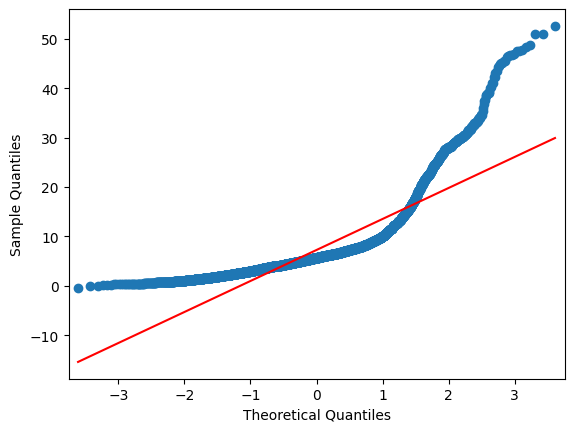

In [ ]:
# QQ Plot
from statsmodels. graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(df["Daily Mean PM2.5 Concentration"], line='s')
pyplot.show()

На графике в верхней и нижней частях представлены отклонения,нельзя предполагать, что данные распределены нормально.

Гравик рассеяния для AQI.

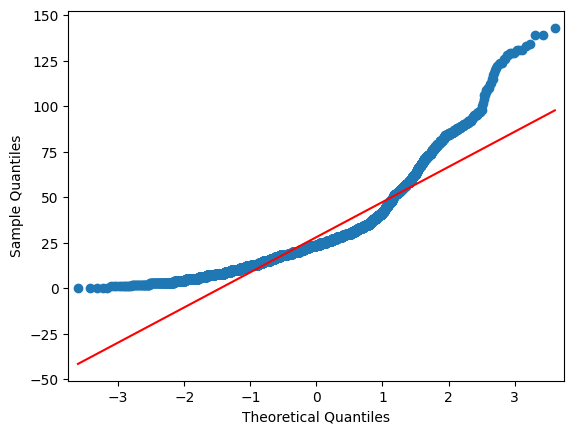

In [ ]:
# QQ Plot
from statsmodels. graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(df["DAILY_AQI_VALUE"], line='s')
pyplot.show()

На графике в верхней и нижней частях представлены отклонения, нельзя предполагать, что данные распределены нормально.

График гистограммы

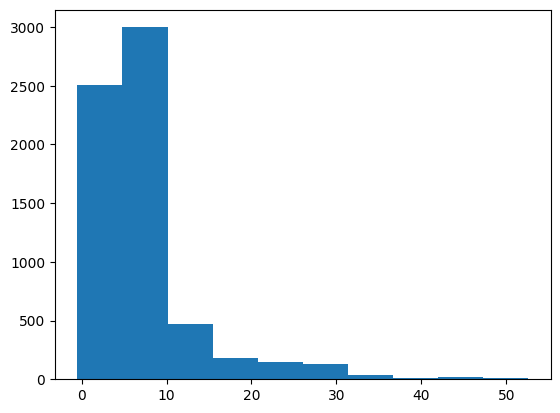

In [ ]:
pyplot.hist(df["Daily Mean PM2.5 Concentration"])
pyplot.show()

Это не нормальное распределение.

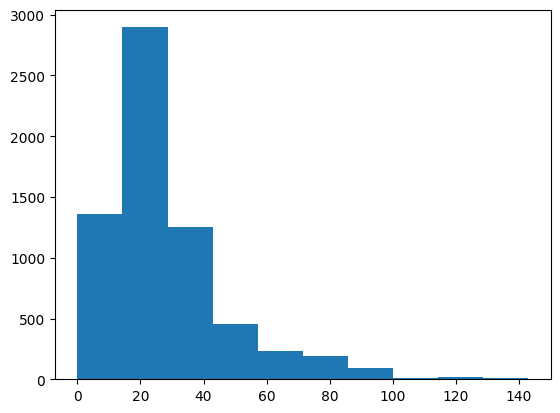

In [ ]:
pyplot.hist(df["DAILY_AQI_VALUE"])
pyplot.show()

Это не нормальное распределение.

# **Шаг 3. Визуализация данных**

Данные содержат несколько записей о концентрации PM2,5 и AQI на одну и ту же дату, измеренных на разных объектах и с помощью разных датчиков (POCS). Постройте средние значения PM2,5 и AQI относительно даты на одном графике. Все, кто анализирует график, должен уметь определять: какова средняя концентрация PM 2,5 или значение AQI на конкретную дату.

Создать датафреймы.

In [ ]:
# Новый датафрейм, вычисляющий среднее значение концентрации PM2,5 за день
df_pm=df.groupby('Date')['Daily Mean PM2.5 Concentration'].mean().reset_index()

# Новый датафрейм, вычисляющий среднее значение AQI за день
df_aqi=df.groupby('Date')['DAILY_AQI_VALUE'].mean().reset_index()

Построить график для PM2.5 Concentration и AQI.

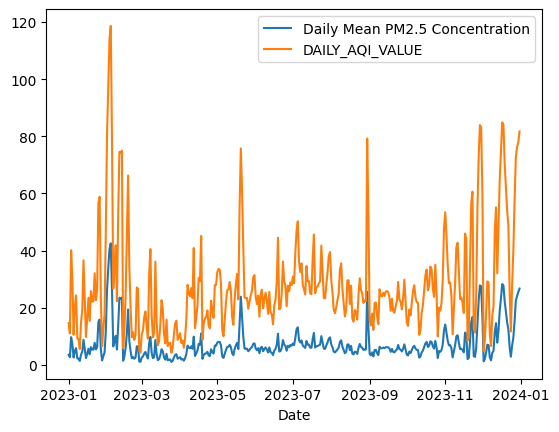

In [ ]:
plt.plot(df_pm['Date'], df_pm['Daily Mean PM2.5 Concentration'], label='Daily Mean PM2.5 Concentration')
plt.plot(df_aqi['Date'], df_aqi['DAILY_AQI_VALUE'], label='DAILY_AQI_VALUE')
plt.xlabel('Date')
plt.legend()
plt.show()

В феврале, мае, сентябре и декабре наблюдаются высокие значения концентрации PM2.5, данных мало для построения выводов.

В феврале, мае, сентябре и декабре наблюдаются высокие значения уровня качества воздуха, данных мало для построения выводов.

Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Результаты для обоих участков должны быть на одном рисунке.

Создать таблицы по нужным идентификаторам участков.

Таблица для участка 490352005.


In [ ]:
df1=df[df['Site ID']==490352005]
df1=df1.groupby('Date')['POC'].mean()
df1=df1.reset_index()
df1

,Date,POC
0,2023-01-01,2.5
1,2023-01-02,2.5
2,2023-01-03,2.5
3,2023-01-04,2.5
4,2023-01-05,2.5
...,...,...
360,2023-12-27,2.5
361,2023-12-28,2.5
362,2023-12-29,2.5
363,2023-12-30,2.5


Таблица для участка 490353015.

In [ ]:
df2=df[df['Site ID']==490353015]
df2=df2.groupby('Date')['POC'].mean()
df2=df2.reset_index()
df2

,Date,POC
0,2023-01-01,2.0
1,2023-01-02,2.0
2,2023-01-03,2.0
3,2023-01-04,2.0
4,2023-01-05,2.0
...,...,...
360,2023-12-27,2.0
361,2023-12-28,2.0
362,2023-12-29,2.0
363,2023-12-30,2.0


Text(0.5, 1.0, 'Зависимость PM 2,5 от даты для 490353015')

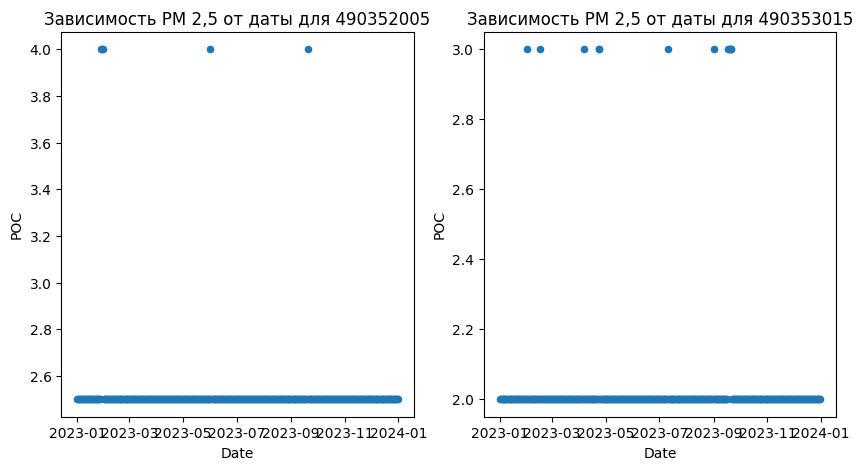

In [ ]:
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(121)
df1.plot(kind='scatter', x='Date', y='POC', ax=ax1)
ax1.set_title("Зависимость PM 2,5 от даты для 490352005")
ax2=fig.add_subplot(1,2,2)
df2.plot(kind='scatter', x='Date', y='POC', ax=ax2)
ax2.set_title("Зависимость PM 2,5 от даты для 490353015")

Постройте график с дневным значением AQI и скользящим средним для дневного значения AQI. Используйте дневное значение AQI, усредненное по сайтам и POC. Поэкспериментируйте с разными временными диапазонами, чтобы найти наиболее подходящее.

Расчет дневного значения AQI, усредненного по сайтам и POC.

In [78]:
average_df=df.groupby(['Site ID', 'POC', 'Date'])['DAILY_AQI_VALUE'].mean().reset_index()
average_df

,Site ID,POC,Date,DAILY_AQI_VALUE
0,490352005,1,2023-01-01,19.0
1,490352005,1,2023-01-02,17.0
2,490352005,1,2023-01-03,52.0
3,490352005,1,2023-01-04,41.0
4,490352005,1,2023-01-05,9.0
...,...,...,...,...
6509,490450004,3,2023-12-27,58.0
6510,490450004,3,2023-12-28,63.0
6511,490450004,3,2023-12-29,66.0
6512,490450004,3,2023-12-30,81.0


Теперь обратимся к этому же датафрейму, чтобы рассчитать среднее значение по датам.

In [80]:
average_df1=average_df.groupby('Date')['DAILY_AQI_VALUE'].mean().reset_index()
average_df1

,Date,DAILY_AQI_VALUE
0,2023-01-01,14.611111
1,2023-01-02,11.000000
2,2023-01-03,40.111111
3,2023-01-04,30.277778
4,2023-01-05,10.555556
...,...,...
360,2023-12-27,57.722222
361,2023-12-28,72.666667
362,2023-12-29,76.222222
363,2023-12-30,77.888889


Рассчитываем скользящее среднее.

In [85]:
moving_average=average_df.groupby('Date')['DAILY_AQI_VALUE'].mean().rolling(window=3).mean().reset_index()
moving_average

,Date,DAILY_AQI_VALUE
0,2023-01-01,NaN
1,2023-01-02,NaN
2,2023-01-03,21.907407
3,2023-01-04,27.129630
4,2023-01-05,26.981481
...,...,...
360,2023-12-27,41.925926
361,2023-12-28,56.796296
362,2023-12-29,68.870370
363,2023-12-30,75.592593


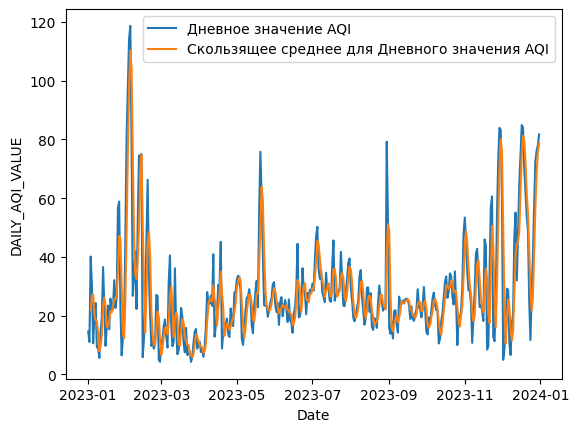

In [87]:
plt.plot(average_df1['Date'], average_df1['DAILY_AQI_VALUE'], label='Дневное значение AQI')
plt.plot(moving_average['Date'], moving_average['DAILY_AQI_VALUE'], label='Скользящее среднее для Дневного значения AQI')
plt.xlabel('Date')
plt.ylabel('DAILY_AQI_VALUE')
plt.legend()
plt.show()

При окне, равном 3, скользящее среднее наиболее приближено к средним значениям.

## Часть 3.2. A/B-тестирование

Сначала прочитайте статью WIRED об A/B-тестировании [здесь] (http://www.wired.com/2012/04/ff_abtesting/).

Предположим, ваша компания разрабатывает новый логотип. Художественный отдел разрабатывает два логотипа: ‘Logo A’ и ‘Logo B’, показанные ниже.
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)

Ваша задача — выяснить, какой логотип лучше.


Вы решаете провести следующий эксперимент. Вы используете рекламу Google, чтобы купить 6000 рекламных объявлений. В $N_A=3000$ объявлений (выбранных случайно) вы используете логотип А, а в остальных $N_B=3000$ объявлениях вы используете логотип Б. Затем вы видите, какой логотип привлекает больше кликов.

Оказывается, $n_A=800$ зрителей с логотипом A нажимают на рекламу, а $n_B=1000$ зрителей с логотипом B нажимают на рекламу. Очевидно, что логотип B показал лучшие результаты в этом тесте, но достаточно ли разница, чтобы сказать, что логотип B лучше? Или, возможно, ‘Logo B’ просто повезло в этом тесте?

Целью этого упражнения будет проведение двухпропорционального z-теста, чтобы определить, лучше ли ‘Logo B’. Шаги будут аналогичны шагам, использованным в эксперименте Солка с полиовакциной в 1954 году (1954 Salk polio-vaccine experiment).


### Задача 3.2.1. Сформулируйте нулевую гипотезу

Пусть $p_A = n_A/N_A$ — доля кликов по логотипу A, и аналогично $p_B$ — доля кликов по логотипу B. В терминах $p_A$ и $p_B$ четко сформулируйте нулевую и альтернативную гипотезы.

Н0: Логотип В не эффективнее логотипа А, а значения pA (доля кликов)  и  pB (доля кликов) в этом тесте вызваны случайностью.

На: Логотип В эффективнее логотипа А.

### Задача 2.2. Найдите двухпропорциональное z-значение

Предполагая нулевую гипотезу, мы знаем, что статистика, называемая *двухпропорциональным z-значением*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
приблизительно распределяется в соответствии со стандартным нормальным распределением. Здесь $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ и $\hat{q} = 1-\hat{p}$.


Найдите двухпропорциональное z-значение.

Посчитать доли кликов для 2 логотипов.

In [ ]:
# количество рекламных объявлений с логотипом А
na=3000
# количество рекламных объявлений с логотипом В
nb=3000
# количество зрителей, нажавших на рекламу с логотипом А
na1=800
# количество зрителей, нажавших на рекламу с логотипом В
nb1=1000
# доля кликов для логотипа А
pa=na1/na
# доля кликов для логотипа В
pb=nb1/nb
print(f"Доля кликов для логотипа А: {pa}")
print(f"Доля кликов для логотипа В: {pb}")

Доля кликов для логотипа А: 0.26666666666666666
Доля кликов для логотипа В: 0.3333333333333333


In [ ]:
p=(na/(na+nb))*pa+(nb/(na+nb))*pb
q=1-p
print(p, q)

0.3 0.7


Считаем двухпропорциональное z-значение.

In [ ]:
from math import sqrt
z=(pa-pb)/sqrt(p*q*((1/na)+(1/nb)))
z

-5.6343616981901095

### Задача 2.3. Завершите z-тест двух пропорций

Найдите значение $p$ для проверки гипотезы. Сначала, используя обычную функцию `cdf`, а затем проверьте свой ответ, запустив z-тест двух пропорций в Python с помощью  `proportions_ztest`.

p value с помощью функции cdf

In [58]:
p_val= stats.norm.cdf(-z)
p_val

8.785395076012362e-09

z-тест двух пропорций в Python с помощью proportions_ztest.

In [61]:
from statsmodels.stats.proportion import proportions_ztest
counts = np.array([800, 1000])
nobs = np.array([3000, 3000])
z, pval = proportions_ztest(counts, nobs, alternative='smaller')
print(z)
print(pval)

-5.6343616981901095
8.785395076012362e-09


Значение p практически равно нулю. Данные очень сильно противоречат нулевой гипотезе. Мы отвергаем нулевую гипотезу.